<h2>Assignment 5</h2>

First, I imported pandas and numpy libraries.
<br>
Then I imported all of the csv files using pd.read.




In [3]:
import numpy as np
import pandas as pd

airports = pd.read_csv('https://raw.githubusercontent.com/hadley/nycflights13/master/data-raw/airports.csv')
airports.head()

airlines = pd.read_csv('https://raw.githubusercontent.com/hadley/nycflights13/master/data-raw/airlines.csv')
airlines.head()

planes = pd.read_csv('https://raw.githubusercontent.com/hadley/nycflights13/master/data-raw/planes.csv')
planes.head()


weather = pd.read_csv('https://raw.githubusercontent.com/hadley/nycflights13/master/data-raw/weather.csv')
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


<h4><b>Question 1:</b> 
<br>What is the northernmost airport in the United States?</h4>

To answer this question, I filtered the data in the airports table by latitude. 
<br><br>
Lines of latitude run from east to west, so the airport with the greatest latitude should be the furthest north.
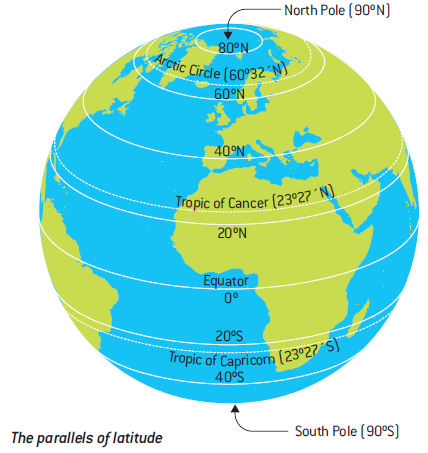


In [34]:
airports.sort_values('lat', ascending=False).head(5)

,faa,name,lat,lon,alt,tz,dst,tzone
417,EEN,Dillant Hopkins Airport,72.270833,42.898333,149,-5,A,NaN
230,BRW,Wiley Post Will Rogers Mem,71.285446,-156.766003,44,-9,A,America/Anchorage
110,AIN,Wainwright Airport,70.638056,-159.994722,41,-9,A,America/Anchorage
708,K03,Wainwright As,70.613378,-159.860350,35,-9,A,America/Anchorage
152,ATK,Atqasuk Edward Burnell Sr Memorial Airport,70.467300,-157.436000,96,-9,A,America/Anchorage


From the results, we can see that <b>Dillant Hopkins Airport has a latitude of 72.270833, making it furthest <i>north.</i> </b>
<br><br>
However, there is missing data for tzone, so we don't know if it is in the United States. 
A quick google confirmed that it is, indeed in the United States.



<h4><b>Question 2:
<br>
What is the easternmost airport in the United States?</b></h4>

To answer this question, I filtered the data in the airports table by longitude and by country.
<br>
Lines of longitude run from north to south, starting at the prime(Greenwich)meridian which is 0 degrees. 
<br>
Anything west of the prime meridian has a positive value, while anything east is negative. 
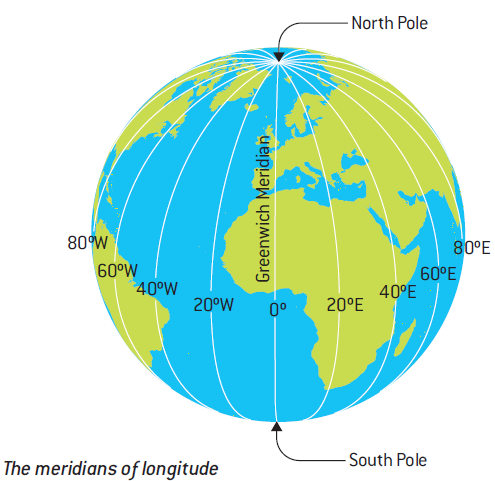

In [33]:
airports.sort_values('lon', ascending=False).head(5)



,faa,name,lat,lon,alt,tz,dst,tzone
1290,SYA,Eareckson As,52.712275,174.113620,98,-9,A,America/Anchorage
942,MYF,Montgomery Field,32.475900,117.759000,17,8,A,Asia/Chongqing
396,DVT,Deer Valley Municipal Airport,33.411700,112.457000,1478,8,A,Asia/Chongqing
417,EEN,Dillant Hopkins Airport,72.270833,42.898333,149,-5,A,NaN
444,EPM,Eastport Municipal Airport,44.910111,-67.012694,45,-5,A,America/New_York


We get <b>Eareckson AS, which has longitude of 174.113620 and the furthest <i>east.</i></b>
<br><br><br>
<b>NOTE:</b>Upon researching, I concluded that this result makes sense because although Alaska is in the eastern hempisphere, it is part of the United States. The result would be different if we were looking for the furthest airport east in the contiguous states. 

<h4><b>Question 3:
<br>
On February 12th, 2013, which New York area airport had the windiest weather?</b></h4>

In [71]:
#Find all weather data for 2/12/2013 where wind speed is greater than 0.
weather[(weather.month == 2) & (weather.year == 2013) & (weather.day == 12) & (weather.wind_speed > 0.0)]
#Narrow down results further to ensure I found the highest value.
weather[(weather.month == 2) & (weather.year == 2013) & (weather.day == 12) & (weather.wind_speed > 23.0)]

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
1009,EWR,2013,2,12,3,39.02,26.96,61.63,260.0,1048.36058,NaN,0.0,1008.3,10.0,2013-02-12T08:00:00Z
18417,LGA,2013,2,12,2,42.98,26.06,50.94,290.0,23.01560,31.07106,0.0,1007.1,10.0,2013-02-12T07:00:00Z


First, I filtered the weather table to show all the data for 2/12/2013, where wind speed was greater than 0.
<br><br><br>
Immediately I saw a high value of 1048.36058. However, this value is too much higher than the other values to be logical, so I thought it might be an outlier.
<br><br><br>
I kept looking and saw a high value of 23.01560, which I thought made sense and was the highest value. I ran the same query replacing 0 with 23, and confirmed there was no other value higher (besides the outlier).
<br><br><br>
<b>LGA had the windiest weather on 2/12/13.</b>

